<center><h1>7SSG2059 Geocomputation</h1></center>

<center><h1>Practical 9: Correlation and Regression</h1></center>

<center><h2>Relationships and Explanations</h2></center>


# Correlation and Regression

Correlation and regression are useful tools to understand relationships between variables in our data, and begin to explain possible causes. This week, we will look at some possible ways that might use these tools to analyse the data for your final report. 

Specifically we will look at:
1. correlation and regression for ALL LSOAs
2. correlation and regression for LSOAs grouped by borough
3. mapping correlations by borough

### Setup

As usual we will be using pandas and geopandas for data analysis, with `matplotlib` and `seaborn` for visualisation. Let's load those now: 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt    #Plotting library used by seaborn, see http://matplotlib.org/users/pyplot_tutorial.html
%matplotlib inline

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

import statsmodels.api as sm 

And ignore any warnings for now...

In [3]:
import warnings 
warnings.simplefilter('ignore')

Later we will import further packages for regression and mapping. 

Finally, in our setup, let's load the data into a pandas `DataFrame`:

In [2]:
df = pd.read_csv(
    'https://github.com/kingsgeocomp/geocomputation/blob/master/data/LondonLSOAData.csv.gz?raw=true',
    compression='gzip', low_memory=False)

## Covariance and Correlation

### Correlation & Covariance Matrices

Let's start by seeing how we can calculate covariance using pandas. Remember, covariance is like an unstandardised version of correlation. Handily, pandas has [a method](http://pandas.pydata.org/pandas-docs/stable/computation.html#covariance) to calculate a matrix (like a table) of covariance values between `series` in a `DataFrame`:

In [6]:
covmat = df.cov()
covmat.iloc[1:10,1:10] # Notice what integer indexing ('*loc*ation') gives us?

,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,GreenspaceArea,RoadsArea,Owned,SharedOwnshp
HHOLDRES,6.641729e+04,-1.752785e+03,1.795979e+03,2.227261e+04,18.912064,-6.720649e+05,2.725263e+06,1.784686e+03,1199.045666
COMESTRES,-1.752785e+03,6.555528e+03,-7.499334e+00,2.879241e+02,-3.996028,6.478611e+05,1.323051e+06,-8.156835e+02,28.147381
POPDEN,1.795979e+03,-7.499334e+00,3.748335e+03,1.669871e+03,-2.925151,-1.473363e+06,-3.351588e+06,-4.507936e+03,107.509735
HHOLDS,2.227261e+04,2.879241e+02,1.669871e+03,1.784931e+04,-31.604373,6.314566e+03,2.156994e+06,4.619716e+02,688.910318
AVHHOLDSZ,1.891206e+01,-3.996028e+00,-2.925151e+00,-3.160437e+01,0.152132,-1.196450e+03,-4.106752e+03,8.359241e-01,-0.757166
GreenspaceArea,-6.720649e+05,6.478611e+05,-1.473363e+06,6.314566e+03,-1196.450056,1.654222e+10,5.643432e+09,1.380412e+06,-48483.784253
RoadsArea,2.725263e+06,1.323051e+06,-3.351588e+06,2.156994e+06,-4106.752282,5.643432e+09,2.479857e+10,2.833041e+06,83940.275384
Owned,1.784686e+03,-8.156835e+02,-4.507936e+03,4.619716e+02,0.835924,1.380412e+06,2.833041e+06,1.830597e+04,-453.160296
SharedOwnshp,1.199046e+03,2.814738e+01,1.075097e+02,6.889103e+02,-0.757166,-4.848378e+04,8.394028e+04,-4.531603e+02,226.084311


That's a lot of numbers... what do they all mean? 

Usually, I'd suggest you pause and have a think about what these numbers tell us. But as discussed in lecture, **correlation coefficients** are often more useful for comparing and understanding relationships than **covariance values**. The important thing here is to understand the _structure_ of the covariance matrix produced above, before we move on to correlation.  

#### Task 1.1

To ensure you understand the structure of the covariance matrix just created, enter values (at 2 decimal places) in the code cells below to provide values for:

- The covariance between `HHOLDRES` and `Owned` is ...
- The covariance between `PM10max` and `SocialRented` is ...

(_Ask_ if you are not sure how the matrix is structured)

In [11]:
print("{:0.3f}".format(covmat.loc['HHOLDRES'][['Owned']].values[0]))

1784.69


In [12]:
print("{:0.3f}".format(covmat.loc['PM10max'][['SocialRented']].values[0]))

124.98


Similar to the covariance method, pandas has [a method](http://pandas.pydata.org/pandas-docs/stable/computation.html#correlation) for calculating the correlation between all `series` in a `DataFrame`. If we don't specify what particular correlation we want, the `corr` method calculates Pearson's _r_ correlation coefficient:

In [15]:
corrmat = df.corr()
corrmat.iloc[1:10,1:10]

,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,GreenspaceArea,RoadsArea,Owned,SharedOwnshp
HHOLDRES,1.000000,-0.084001,0.113826,0.646874,0.188143,-0.020276,0.067151,0.051183,0.309428
COMESTRES,-0.084001,1.000000,-0.001513,0.026617,-0.126536,0.062213,0.103767,-0.074460,0.023121
POPDEN,0.113826,-0.001513,1.000000,0.204152,-0.122495,-0.187109,-0.347631,-0.544204,0.116787
HHOLDS,0.646874,0.026617,0.204152,1.000000,-0.606493,0.000367,0.102524,0.025557,0.342939
AVHHOLDSZ,0.188143,-0.126536,-0.122495,-0.606493,1.000000,-0.023850,-0.066861,0.015840,-0.129106
GreenspaceArea,-0.020276,0.062213,-0.187109,0.000367,-0.023850,1.000000,0.278633,0.079326,-0.025071
RoadsArea,0.067151,0.103767,-0.347631,0.102524,-0.066861,0.278633,1.000000,0.132967,0.035450
Owned,0.051183,-0.074460,-0.544204,0.025557,0.015840,0.079326,0.132967,1.000000,-0.222751
SharedOwnshp,0.309428,0.023121,0.116787,0.342939,-0.129106,-0.025071,0.035450,-0.222751,1.000000


The matrix produced has the same structure as for the covariance matrix. 

#### Task 1.2 

Let's identify the Pearson correlation coefficient (i.e. value) for the same pairs of variables as we did for covariance (edit the cells below again, providing values to three decimal places): 

- The Pearson correlation between `HHOLDRES` and `Owned` is ...
- The Pearson correlation between `PM10max` and `SocialRented` is ...

In [18]:
print("{:0.3f}".format(corrmat.loc['HHOLDRES'][['Owned']].values[0]))

0.051


In [20]:
print("{:0.3f}".format(corrmat.loc['PM10max'][['SocialRented']].values[0]))

0.144


**TASK:** Compare the Pearson _r_ values to the covariance values. Check you understand why the values are different and why correlation values are often more useful. 

### Correlation Heatplot

Even though the 'standardised' correlation values are a bit easier to read than the covariance values, it would still be useful to think about how we can visualise these numbers for quick reference. The seaborn `heatmap` [plot](http://seaborn.pydata.org/generated/seaborn.heatmap.html) is useful in this circumstance:  

Text(0.5, 1, 'Pearson Correlation')

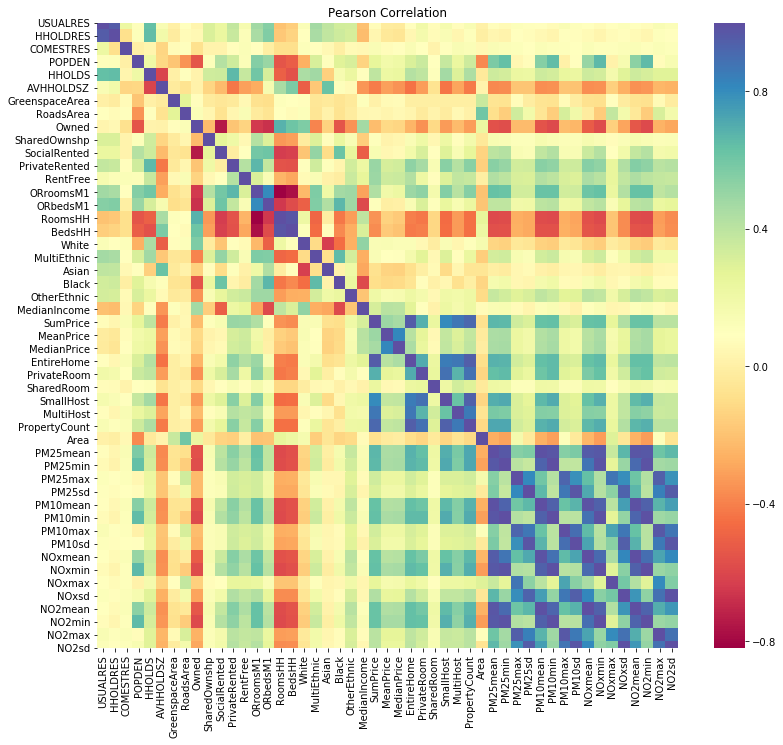

In [24]:
fig, ax = plt.subplots(1,1,figsize=(13,11.5))
sns.heatmap(corrmat, cmap='Spectral')
plt.title("Pearson Correlation")

#### Task 2.1

Compare the plot just created to the Pearson correlation matrix to check you understand how the heatmap plot represents the matrix. For example, why is there a diagonal line of high values? Why does the bottom right corner have the pattern it does?

> Your answer here!

> The diagonal is simply autocorrelation: the correlation of variable with itself... which you'd hope would be perfect. Other patterns that appear have to do with relationships between related/similar variables: PM2.5 min and mean are strongly correlated, but PM2.5 max is not correlated in the same way... you can also see that some types of pricing information in Airbnb is correlated, but others are not.

#### Task 2.2 

Why do you think we used a 'Spectral' colormap here?

> Your answer here!

Remember you could save this plot to file (in the same directory where your notebook is saved) for use in your reports by doing something like:
```python
plt.savefig('Heatmap-Pearson.png', bbox_inches='tight', dpi=200)
plt.close()
```

### Pairplot

Another plot that is often useful is the seaborn `pairplot` which produces scatter plots for all pairs of 'series' in a `DataFrame`. Read more [here](http://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset). 

Our LSOA dataframe is quite large and you would find, if you tried to run the `pairplot` function for the entire dataframe, that it would take a very long time to calculate and the plot produced would be huge. So, to use the pairplot function here we will subset the dataframe to fewer `series` and run the pairplot function on that.

First, let's remind ourselves of the series in our dataframe:

In [25]:
print(df.columns)

Index(['LSOA11CD', 'LSOA11NM', 'MSOA11CD', 'MSOA11NM', 'LAD11CD', 'LAD11NM',
       'RGN11CD', 'RGN11NM', 'USUALRES', 'HHOLDRES', 'COMESTRES', 'POPDEN',
       'HHOLDS', 'AVHHOLDSZ', 'geometry', 'GreenspaceArea', 'RoadsArea',
       'Owned', 'SharedOwnshp', 'SocialRented', 'PrivateRented', 'RentFree',
       'ORroomsM1', 'ORbedsM1', 'RoomsHH', 'BedsHH', 'White', 'MultiEthnic',
       'Asian', 'Black', 'OtherEthnic', 'MedianIncome', 'SumPrice',
       'MeanPrice', 'MedianPrice', 'EntireHome', 'PrivateRoom', 'SharedRoom',
       'SmallHost', 'MultiHost', 'PropertyCount', 'Area', 'PM25mean',
       'PM25min', 'PM25max', 'PM25sd', 'PM10mean', 'PM10min', 'PM10max',
       'PM10sd', 'NOxmean', 'NOxmin', 'NOxmax', 'NOxsd', 'NO2mean', 'NO2min',
       'NO2max', 'NO2sd'],
      dtype='object')


Let's produce the pairplot for all series between `GreenspaceArea` and `PrivateRented`. So first, create the subset DataFrame:

In [26]:
sub = df.loc[:,'GreenspaceArea':'PrivateRented']  #subset all rows, and columns from GSA to PR

Now run the pairplot for the subset DataFrame:

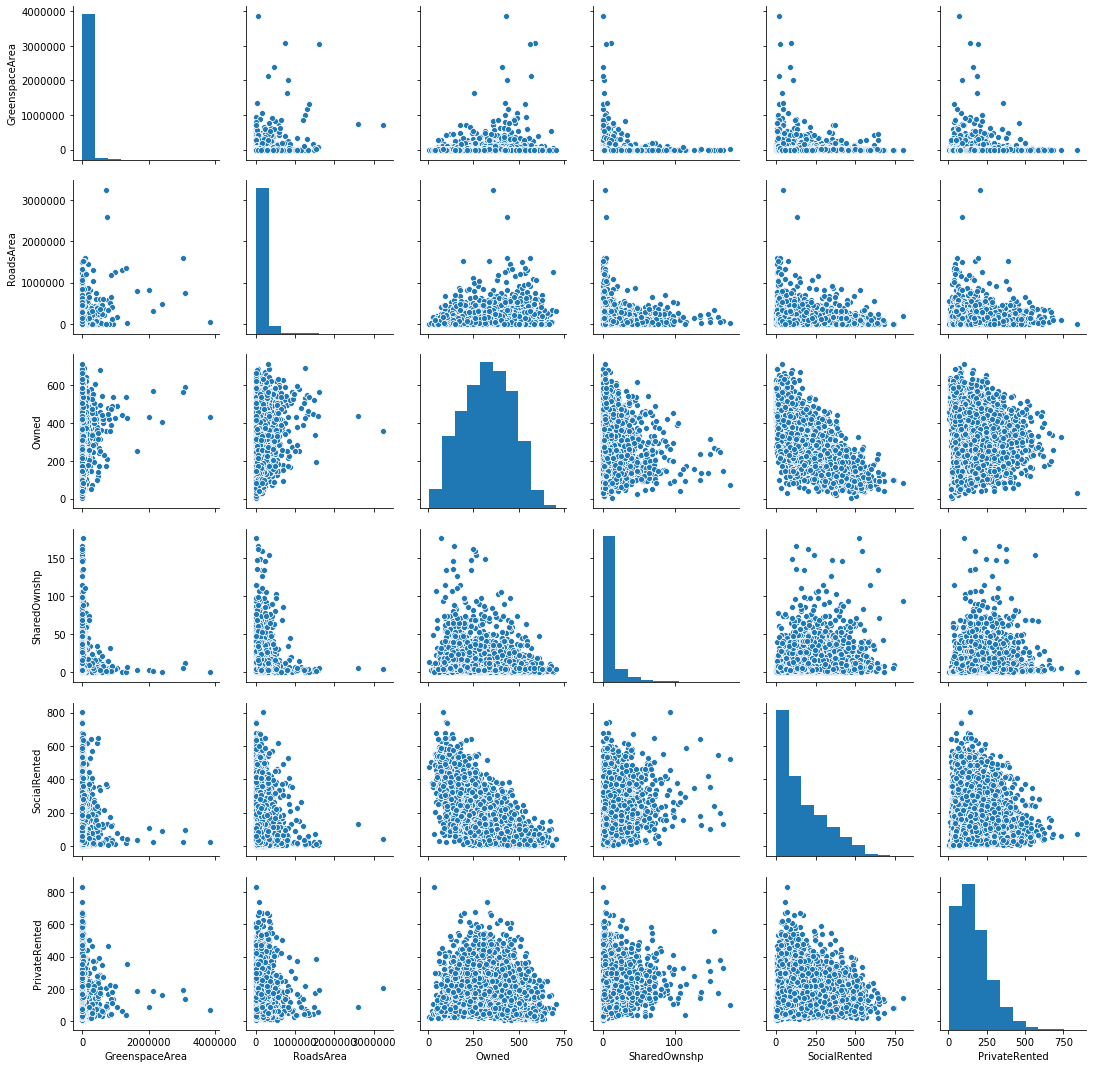

In [28]:
fig = sns.pairplot(sub)

It may have taken a few seconds to run that function - it would have been much longer had we tried to do it for the entire DataFrame! (which is why I suggested we take a subset of the DataFrame)

#### Task 3.1

Take a look at the pairplot produced and check you can see how it is a set of scatter plots for each pair of variables with a histogram for each individual variable. Pretty nice.

> Any comments or observations here!

We can note two things from the pairplot above:
1. Several of the variable are not normally distributed
2. The relationships between these variables are not particularly clear 

#### Task 3.2

Let's see if these observations hold for some of the air quality variables, but to help you learn some Python syntax I want you to use a 'list comprehension' to select only the NO variables from the data frame while _also_ excluding the NO standard deviation variables. The basic format for a list comprehension is:
```python
[x for x in <list>]
```
The output of a list comprehension is _also_ a list. This is basically a really clever way to write 'do something to every element in the list without needing a for loop'. So, for instance:
```python
[2*x for x in <list>]
```
Would double every element of the list and return _that_ as a new list.

The real magic is that we can _also_ filter data:
```python
[x for x in <list> if x % 2==0]
```
would return only the even elements of a list.

With those as clues, think about what the `NO...` columns have in column and _then_ think about how you would remove the NO columns that are measuring the standard deviation. This can all be done in one line, but you might want to start out by trying to do it in two list comprehensions.

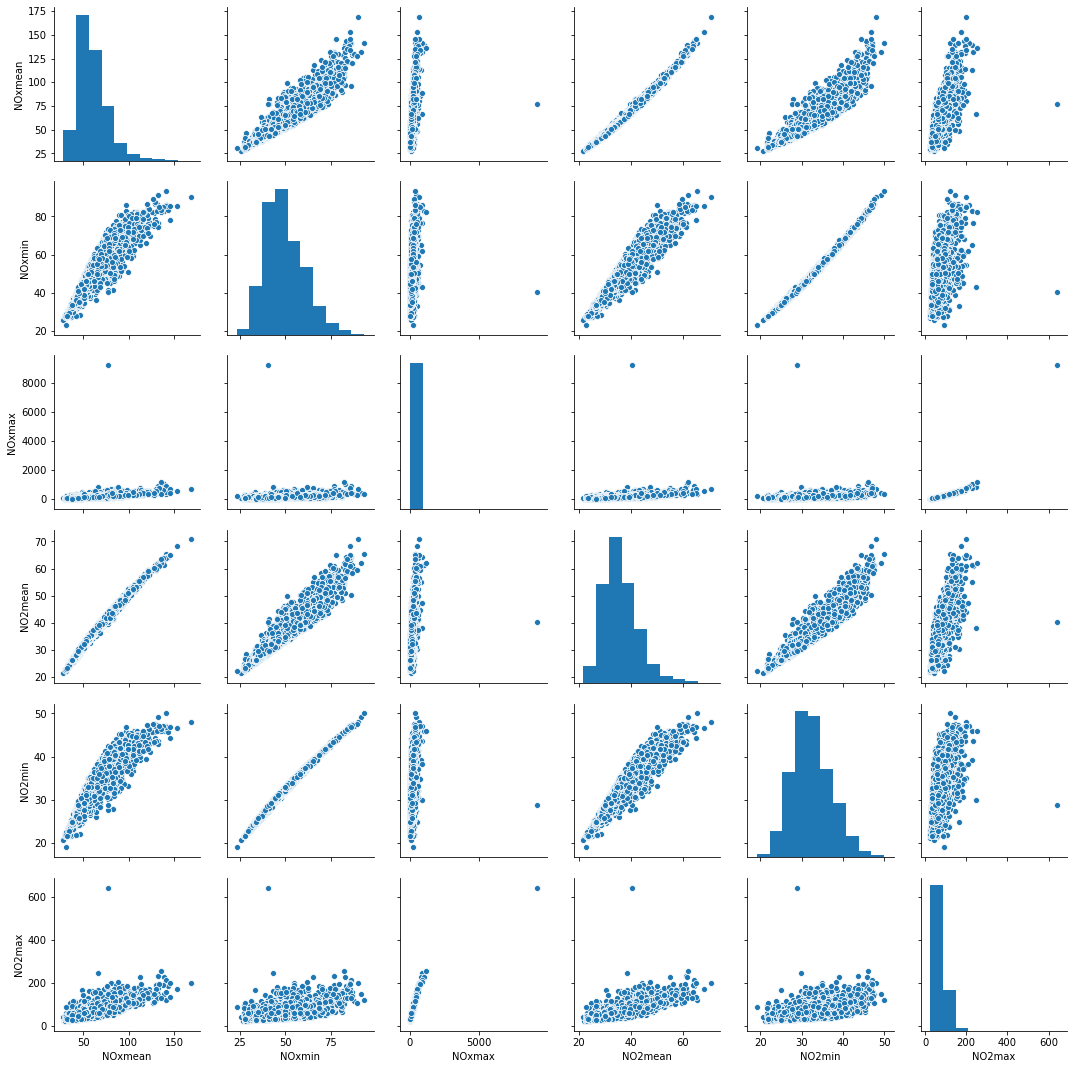

In [31]:
NOx = df.loc[:,[x for x in df.columns.values if x.startswith('NO') and not x.endswith('sd')]]
fig = sns.pairplot(NOx)

#### Task 3.3 

Looking at the pairplot for NO variables check you can see which variables have normal-like distributions and which are non-normal, and which variables have strong relationships and which are weak. Think about possible reasons for any differences. Also look closely at the scatter plots themselves; do you notice anything that might be influencing your impressions?

> Your answer here.

> Generally the strongest relationships are between the same measures of NOx and NO2 (e.g. mean vs mean). Mean and Min values are most normal-like, max (and sd) is generally non-normal. But note also that some of these results seem to very strongly influenced by a _huge_ outlier on the _max_ measures.

### Jointplot

Above we have seen how to calculate correlation matrices and plots for _all_ series (variables) in a DataFrame. But to zoom in on individual relationships, such as between `HHOLDRES` and `Owned` or between `PM10max` and `SocialRented`, let's create `jointplot`s for these pairs:

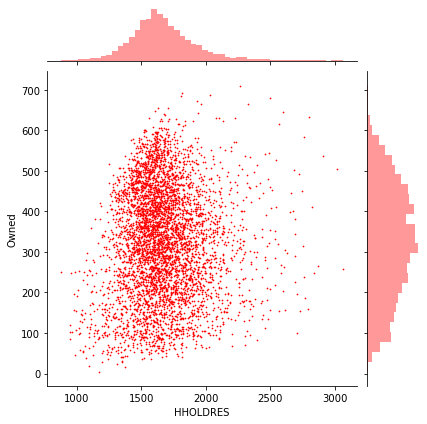

In [37]:
sns.jointplot(x="HHOLDRES", y="Owned", data=df, marker='.', color='red', joint_kws={'s':2})

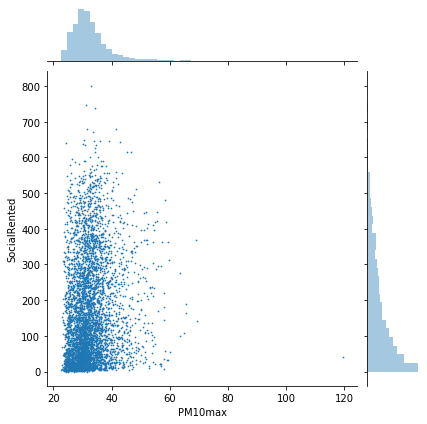

In [42]:
sns.jointplot(x="PM10max", y="SocialRented", data=df, marker='.', joint_kws={'s':2})

Looking at the jointplots above, do you think a Pearson correlation is appropriate? Let's check the Spearman rank correlation coefficients for our data:

In [44]:
corspmat = df.corr(method = "spearman")
print("Spearman rank correlation coefficient matrix:")
corspmat.iloc[1:10,1:10]

Spearman rank correlation coefficient matrix:


,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,GreenspaceArea,RoadsArea,Owned,SharedOwnshp
HHOLDRES,1.000000,-0.013346,0.176156,0.586123,0.159311,0.006180,0.118119,0.022071,0.314798
COMESTRES,-0.013346,1.000000,-0.009502,0.125836,-0.177783,0.025790,0.130212,-0.038045,0.030414
POPDEN,0.176156,-0.009502,1.000000,0.227812,-0.151881,-0.248642,-0.296672,-0.556788,0.212157
HHOLDS,0.586123,0.125836,0.227812,1.000000,-0.645775,0.018419,0.158692,0.005340,0.349439
AVHHOLDSZ,0.159311,-0.177783,-0.151881,-0.645775,1.000000,-0.009739,-0.098757,0.048141,-0.150312
GreenspaceArea,0.006180,0.025790,-0.248642,0.018419,-0.009739,1.000000,0.139571,0.006534,-0.004085
RoadsArea,0.118119,0.130212,-0.296672,0.158692,-0.098757,0.139571,1.000000,0.061102,0.088814
Owned,0.022071,-0.038045,-0.556788,0.005340,0.048141,0.006534,0.061102,1.000000,-0.296599
SharedOwnshp,0.314798,0.030414,0.212157,0.349439,-0.150312,-0.004085,0.088814,-0.296599,1.000000


#### Task 4.1 

Identify the Spearman correlation coefficient (i.e. value) for the same pairs of variables as we did for Pearson's r above (edit the cells below again, providing values to three decimal places): 

- The Spearman correlation between `HHOLDRES` and `Owned` is ...
- The Spearman correlation between `PM10max` and `SocialRented` is ...

In [46]:
print("{:0.3f}".format(corspmat.loc['HHOLDRES'][['Owned']].values[0]))

0.022


In [47]:
print("{:0.3f}".format(corspmat.loc['PM10max'][['SocialRented']].values[0]))

0.201


#### Task 4.2 

Compare the Spearman rank correlation coefficients you have just entered above, to the corresponding Pearson correlation coefficients. For each pair of variables, which correlation do you think is most appropriate?

> Your answer here.

> For HHOLDRES and Owned: weak relationship so distribution/linearity not much of an issue and Peason is fine.
> For PM10max and SocialRented: non-normal distribution of variables means spearman more appropriate

**TASK:** For the pairplots above, enter code in the cells below to write (i.e. save) images to file on your hard disk as `.png` files. 

In [22]:
#remove!
sb.pairplot(sub)
plt.savefig('Pairplot1.png', bbox_inches='tight')
plt.close()

In [23]:
#remove!
sb.pairplot(NO)
plt.savefig('Pairplot2.png', bbox_inches='tight')
plt.close()

## Regression

Now that we have seen how you might use correlation to examine the data, let's move on to look at regression by picking up on some of the ideas we examined in in the notebook on _transformations_.

We'll look at the possible relationship between pollution and the presence of major roads: 

Text(0.5, 0.98, 'NOx (Max) against Roads Area"')

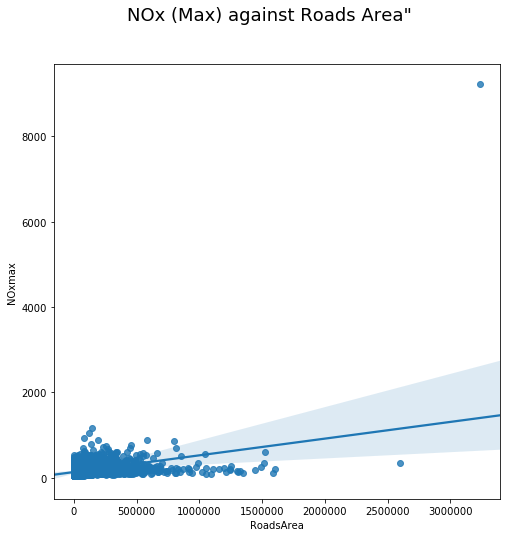

In [54]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.regplot(x=df.RoadsArea, y=df.NOxmax)
fig.suptitle('NOx (Max) against Roads Area"', fontsize=18, color="k")

It looks like our _RoadsArea_ data are very heavily skewed: there are quite a lot of very low values in the data, but there also seems to a be at least one major _NOxmax_ outlier that is _so_ different in scale that we should consider whether to even keep it in the analysis. This is what we would call a 'leverage point' in a regression model: it alters the entire regression! 

### Dealing with Leverage

Let's identify which LSOA has such a high _NOxmax_ value (using a new bit of code, you can investigate what it's doing later if you like):

In [56]:
print("The outlier LSOAs are: " + ",".join(df[df.NOxmax > 2000]['LSOA11NM'].values))   #something new!

The outlier LSOAs are: Hillingdon 031A


#### Task 5.1

Where is Hillingdon? What mught be happening there that means it has such high NOx values?

> Your answer here.

> This LSOA contains Heathrow airport and it is this that is likely causing this huge NOx value.

Let's try stripping that LSOA out and make the plot again:

Text(0.5, 0.98, 'NOx (Max) against Roads Area"')

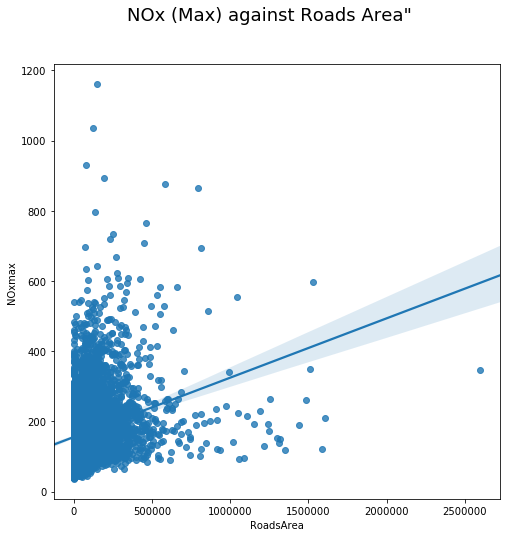

In [57]:
# first remove the LSOA with high NOx
dfn = df[df.NOxmax < 2000]

# then plot
fig, ax = plt.subplots(1,1,figsize=(8,8))
g = sns.regplot(x=dfn.RoadsArea, y=dfn.NOxmax)
fig.suptitle('NOx (Max) against Roads Area"', fontsize=18, color="k")

The distribution of these variables is _still_ quite skewed; let's see how the Spearman rank correlation (which is more robust to skewed distributions and Pearson's r) would look for these variables:

In [62]:
from scipy.stats import spearmanr  #import spearmanr function from scipy.stats 
from scipy.stats import pearsonr  #import pearson function from scipy.stats 

sp_corr, sp_p_val = spearmanr(dfn.RoadsArea.values, dfn.NOxmax.values)
p_corr, p_p_val   = pearsonr(dfn.RoadsArea.values, dfn.NOxmax.values)

print("Spearman Correlation results: {0:0.5f} correlation with p-value {0:0.5f}".format(sp_corr, sp_p_val))
print("Pearson Correlation results: {0:0.5f} correlation with p-value {0:0.5f}".format(p_corr, p_p_val))

Spearman Correlation results: 0.37330 correlation with p-value 0.37330
Pearson Correlation results: 0.25690 correlation with p-value 0.25690


Note that in the code above we imported the `spearmanr` and `pearsonr` from the `scipy.stats` [package](https://docs.scipy.org/doc/scipy/reference/stats.html). This is what `pandas` is doing in the background (because, again, it's working with numpy arrays and scipy is designed to work with this as well).

Note how the Spearman rank correlation coefficient is greater than the Pearson correlation coefficient, but the p-value is as well indicating a less significant result. Think about how ranking the data (which is what Spearman implicitly does) might improve the correlation, compared to looking at the absolute values. 

Let's try to transform the data so that they look more like a normal distribution.Let's try a log transform:

In [63]:
logRA = pd.Series(np.log(dfn.RoadsArea + 1))

Now let's examine these trandformed data:

count    4834.000
mean        8.689
std         4.911
min         0.000
25%         7.411
50%        11.244
75%        11.921
max        14.770
Name: RoadsArea, dtype: float64


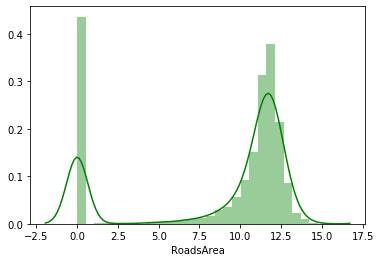

In [64]:
print(logRA.describe().round(3))
sns.distplot(logRA, color='green')

Now this _is_ interesting: the output of the graph shows what seems to be two quite different things going on in our data! We've obviously got the LSOAs that contain _no_ major roads, but then we've got something else that is _much_ closer to 'normal' (though obviously not properly normal as there is clear evidence of negative skew). Technically, this is closer to _log-normal_ 

As we go on to see if we can use regression to estimate the importance of roads for NOx we'll see how transforms are useful for regression. 

First, though let's remove the LSOAs from our data that have no major roads and plot the distribution of the remaining data. 

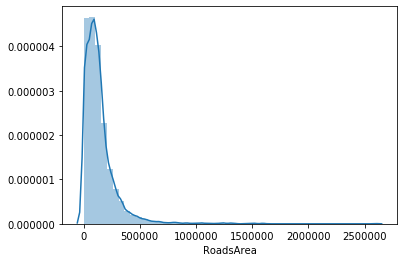

In [75]:
hrds = dfn.loc[dfn.RoadsArea > 0].copy() # hrds == has (major) roads
sns.distplot(hrds.RoadsArea)

Is this distribution normal? How would you describe it?

How many LSOAs do we have left? 

#### Task 6.1 

Add a line of code here to check how many LSOAs are in the `hrds` dataframe:

In [67]:
##remove!
len(hrds.RoadsArea)

3723

### Performing a Regression in Python

Thinking back to what Lumley _et al._ (2002, p.166) said about how, 

>"…linear regression [does] not require any assumption of Normal distribution in sufficiently large samples. Previous simulations studies show that “sufficiently large” is often under 100, and even for our extremely non-Normal medical cost data it is less than 500."

Hopefully, it's clear that in the `hrds` data we maybe don't need to worry about the fact that the `RoadsArea` data (where roads are present) has a log-normal distribution. So let's just fit a regression with our un-transformed data and see what we get.   

In python, linear regression can be performed using functions available in the `statsmodels` [package](http://www.statsmodels.org/stable/), and specifically using the [OLS function](http://www.statsmodels.org/devel/examples/notebooks/generated/ols.html) from the `statsmodels.api`. So let's import `statsmodels.api` first:     

In [68]:
import statsmodels.api as sm 

Using the `OLS` function from `statsmodels` to fit a regression requires we create an `OLS` object first, then use the `fit` method on that object. To create the `OLS` object we can use the `from_formula` method to pass the equation of the model we want to fit (as well as indicating what the data are that we are using):

In [69]:
NOxmax_roads_mod = sm.OLS.from_formula("NOxmax ~ RoadsArea", data = hrds) 
NOxmax_roads_mod_fit = NOxmax_roads_mod.fit()

What happened...? Well, it looks like nothing happened but we have indeed now fit a regression model! 

To check this we we should look at a summary of the model (by using the `summary` method on the `fit model` object we just created) to understand what the model can tell us:

In [70]:
NOxmax_roads_mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NOxmax   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           7.15e-31
Time:                        15:48:46   Log-Likelihood:                -22462.
No. Observations:                3723   AIC:                         4.493e+04
Df Residuals:                    3721   BIC:                         4.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    170.3006      2.229     76.395      0.000     165.930     174.671
RoadsArea      0.0001   1.05e-05     11.658      0.000       0.000       0.000
==============================================================================
Omnibus:                     1668.867   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12429.871
Skew:                           1.979   Prob(JB):                         0.00
Kurtosis:                      11.029   Cond. No.                     2.87e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Task 5.2

Interpret the results of your regression by answering the following questions:
- What is r-squared value?
- What is p-value for the `RoadsArea` variable?
- What is the effect size of the `RoadsArea` variable?  (you might need to look at LSOA metadata to check the units of the variables we are modelling!)

> Your answers here.

> Answers:
> 
> r2: 0.035 (we could say that it 'explains' 3% of the variance)
>
> p-value: <0.001 (it is statistically significant)
> 
> Effect size: For every 1 sq_m of RoadsArea increase, we would expect 0.0001 microgrammes per metre cubed of NOx more

But now we need to check for problems in our residuals (look back to your lecture notes about this). 

First, let's plot a histogram of the residuals, using the `.resid` method applied to the fit OLS model object:

Text(0.5, 0, 'Residuals')

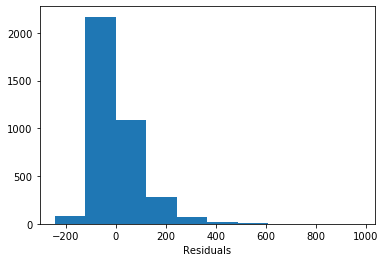

In [71]:
ax = plt.hist(NOxmax_roads_mod_fit.resid)
plt.xlabel('Residuals')

#### Task 5.3

What do you think? Are the residuals normally distributed? But, given the number of values we used to fit the model does this question matter?

> Your answer here.

> The residuals are not normally distributed, but more important than the distribution of the residuals (given that we fit the model with > 3000 data points), is to check the variance of the _standardised_ residuals (again, look back to your lecture notes). 

There's no built-in method for calculating standardised residuals, so we do that first:

In [72]:
# calculate standardized residuals ourselves
NOxmax_roads_mod_sr = (NOxmax_roads_mod_fit.resid / np.std(NOxmax_roads_mod_fit.resid)) 

Now we plot these in a scatter plot against the predicted values:

Text(0, 0.5, 'Standardized Residuals (z)')

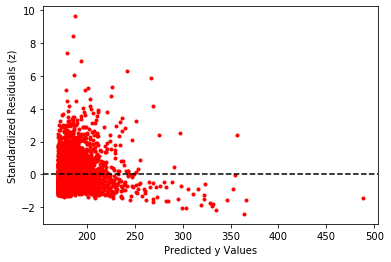

In [73]:
ax = plt.plot(NOxmax_roads_mod_fit.fittedvalues, NOxmax_roads_mod_sr, 'r.')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals (z)')                

These certainly don't _look_ like constant variance in the standardised residuals.

Thinking back to what Lumley _et al._ (2002, p.166) said about how, 

> "Linear regression does assume that the variance of the outcome variable is approximately constant"

So despite having such a large data set, we _do_ need to sort this out. 

So let's try fitting the model with _transformed_ data. We'll try a log transform, so first we need to calculate new values for our variables:

In [76]:
hrds['logRoadsArea'] = np.log(hrds['RoadsArea'])
hrds['logNOxmax']    = np.log(hrds['NOxmax'])

Let's just quickly check that we created the new `Series` correctly:

In [81]:
hrds.iloc[1:5,-5:]

,NO2min,NO2max,NO2sd,logRoadsArea,logNOxmax
1,42.3820,80.7450,6.3878,12.176133,5.256045
2,42.9148,81.4941,6.0950,10.932042,5.241855
3,43.7231,234.1228,23.2659,12.158660,6.794688
4,31.1267,34.9157,0.7742,10.264573,4.050706


It looks like we're okay, so we'll move on to now fit the regression with our new log transformed variables: 

In [82]:
logNOxmax_logRoads_mod     = sm.OLS.from_formula('logNOxmax ~ logRoadsArea', data=hrds)
logNOxmax_logRoads_mod_fit = logNOxmax_logRoads_mod.fit() 

Before looking at the summary, let's look at the residuals to see if we have overcome the issue we had with the un-transformed data.

#### Task 5.4 

Add code in the two code blocks below to plot:
- a histogram of residuals
- a scatterplot of standardised residuals vs predicted values

Text(0.5, 0, 'Residuals')

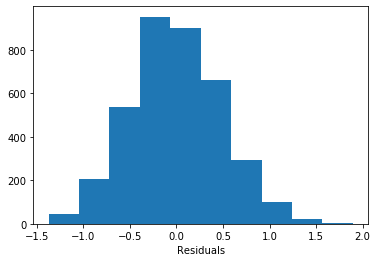

In [83]:
#remove!
ax = plt.hist(logNOxmax_logRoads_mod_fit.resid)
plt.xlabel('Residuals')

Text(0, 0.5, 'Standardized Residuals')

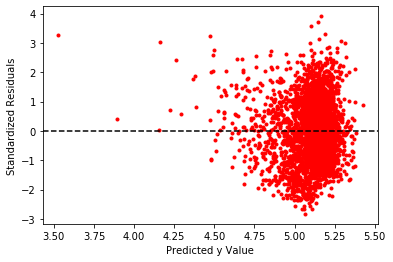

In [84]:
#remove!

#calculate standardized residuals ourselves
logNOxmax_roads_mod_sr = (logNOxmax_logRoads_mod_fit.resid / np.std(logNOxmax_logRoads_mod_fit.resid)) 

#standardized residuals vs fitted values
ax = plt.plot(logNOxmax_logRoads_mod_fit.fittedvalues, logNOxmax_roads_mod_sr, 'r.')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Value')
plt.ylabel('Standardized Residuals')                

You should see that the histogram of the residuals looks quite normal, and the variance of the standardised resiudals is reasonably constant. So using the log transformed variables seems to have helped! 

So now let's look at the summary:

In [85]:
logNOxmax_logRoads_mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logNOxmax   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     275.1
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           1.14e-59
Time:                        16:30:38   Log-Likelihood:                -2588.5
No. Observations:                3723   AIC:                             5181.
Df Residuals:                    3721   BIC:                             5193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0852      0.062     65.739      0.000       3.963       4.207
logRoadsArea     0.0906      0.005     16.587      0.000       0.080       0.101
==============================================================================
Omnibus:                       21.867   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.188
Skew:                           0.186   Prob(JB):                     1.52e-05
Kurtosis:                       2.932   Cond. No.                         89.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Task 5.5 

Interpret the results of your regression by answering the following questions:
- What is the r-squared value?
- What is p-value for the `logRoadsArea` variable?
- What is the effect size of the `logRoadsArea` variable?  (remember we now have log values! So see Table 2 of Lin et al. in lecture slides) 
- What is the confidence interval?

> Your answers here.

> Answers:
>
> r2: 0.069  (still not very good!)
> 
> p-value: <0.001 this might be expected given large number of values used to fit the regression 
> 
> Effect size: the coefficient is <0.1 so we can interpret this as for a 1% increase in RoadsArea we would expect an increase of 0.09% in NOx
> 
> Confidence interval: and at 95% confidence we think the effect is between 0.08% and 0.1%

You should have noted that the $r^{2}$ value is not very large, indicating not much of the variation in NOx is explained by variation in RoadsArea (and this is also shown by the small effect size). 

A quick look at a scatter plot of the two variables shows why the _r2_ is so poor: 

Text(0, 0.5, 'log(NOx max)')

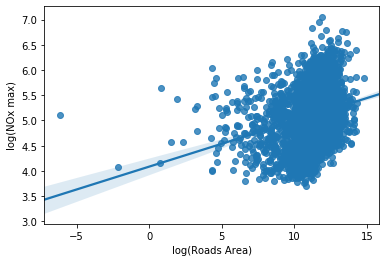

In [87]:
h = sns.regplot(x=hrds.logRoadsArea, y=hrds.logNOxmax)  
plt.xlabel('log(Roads Area)')
plt.ylabel('log(NOx max)')    

It's worth noting that regression plots (while very useful) _can_ be hard to read accurately because the number of data points in the main cluster is masked by the size of the points themselves. For instance:

Text(0, 0.5, 'log(NOx max)')

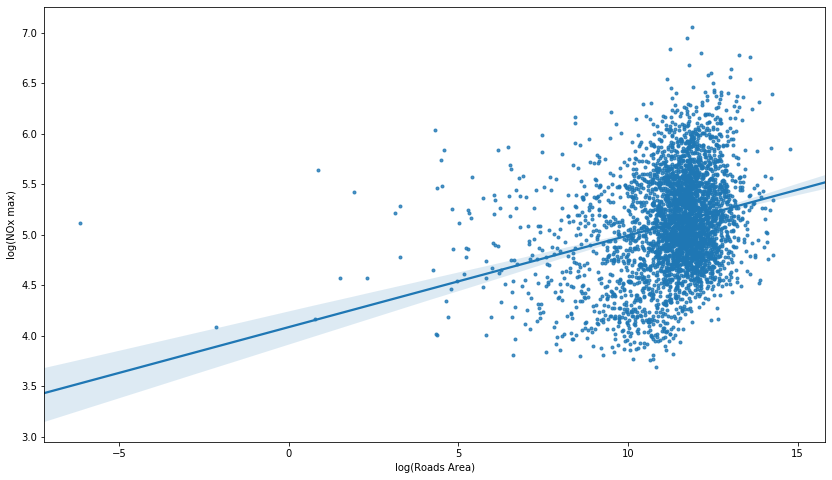

In [91]:
fig, ax = plt.subplots(1,1,figsize=(14,8))
h = sns.regplot(x=hrds.logRoadsArea, y=hrds.logNOxmax, marker='.', ax=ax)  
plt.xlabel('log(Roads Area)')
plt.ylabel('log(NOx max)')    

### Plotting Residuals Geographically

Here is something that is easy to do, but all too rarely done by researchers:

3543    0.142300
1878   -0.049317
2816   -0.319306
2502    0.172974
4594    1.169047
3694    0.684050
1965   -0.170893
1823    0.820754
3798   -0.224164
31     -0.451424
2941   -0.498226
415     0.015185
2471    0.494352
1588   -0.087401
2975    0.373030
dtype: float64


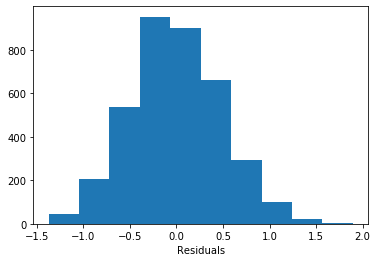

In [112]:
plt.hist(logNOxmax_logRoads_mod_fit.resid)
plt.xlabel('Residuals')

print(logNOxmax_logRoads_mod_fit.resid.sample(n=15)) # Just so that you can see this is a data series!

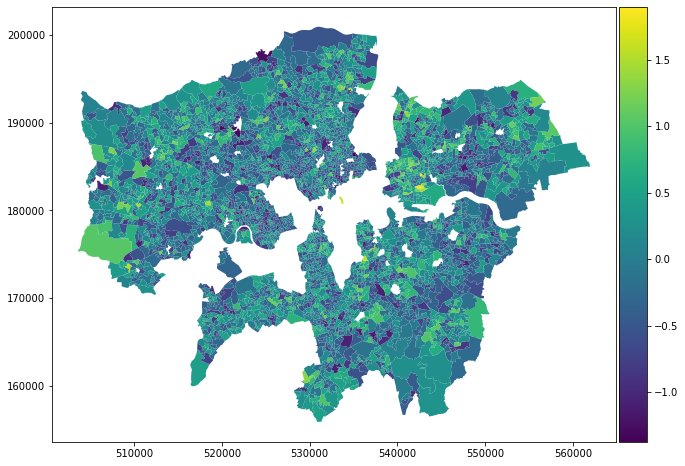

In [127]:
# Join the residuals back on to the HRDS data frame and 
# then join that to the geometry of LSOAs so that we can
# plot them.
hrds['Residuals'] = logNOxmax_logRoads_mod_fit.resid
lsoas = gpd.read_file('https://github.com/kingsgeocomp/geocomputation/raw/master/data/src/LSOAs.gpkg', driver='GPKG')
geom = lsoas.geometry
p = pd.merge(lsoas, hrds, left_on='lsoa11cd', right_on='LSOA11CD', how='inner')
gdf = gpd.GeoDataFrame(p, geometry=geom)

# And now plot it.
fig, ax = plt.subplots(1,1,figsize=(15,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
gdf.plot(column='Residuals', ax=ax, cmap=mpl.cm.get_cmap('viridis'), linewidth=0, legend=True, cax=cax)

What we're looking for is pattern in the residuals because that implies that our model is _systematically_ under- or over-predicting errors. We'd normally interpret this in the context of missing variable(s) from the model. There is a _slight_ suggestion of some patterning to the data but, if so, it's very mild. So our model isn't missing something _obvious_ but, that said, it's also the case that we are still doing a pretty bad job of 'explaining' the data with this model (ca. 6%).

## Regression by Borough

One reason there may be a poor relationship between roads and NOx for our entire data set is that there may be variation in that relationship across London. For example, would we expect the same influence of roads on NOx in central London compared to the suburbs?

So let's have a look at how we could calculate correlations or fit regressions for data **at the borough-level**. To do that we'll need to use some of the techniques we learned for grouping data in Week 7. In particular, we use the `groupby` pandas  method again:

In [128]:
grouped = hrds.groupby('LAD11NM')
print(grouped.groups.keys())

dict_keys(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'])


We can now create DataFrames for individual boroughs by using `get_group` methods on the `groupby` object:

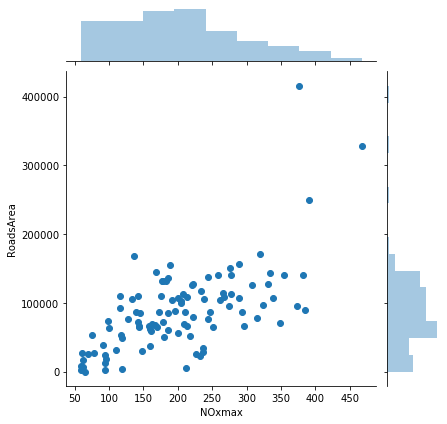

In [129]:
Hackney = grouped.get_group('Hackney')
sns.jointplot(x='NOxmax', y='RoadsArea', data=Hackney) 

From this plot we can see there might indeed be a stronger relationship for the borough of Hackney. But also we notice that there are far fewer data points (as now we are looking at only the LSOAs in one borough, not across the whole of London).  

#### Task 6.1 

Given that it looks like there may be a stronger relationship for the borough of Hackney, fit a linear regression using the `Hackney` DataFrame for `NOxmax ~ RoadsArea`. Refer to and reuse code from above if you need to:
- first create a model object
- then use the `.fit()` method to actually fit the regression
- finally, use the `.summary()` method to interpret the model

In [130]:
#remove!
h_NOxmax_roads_mod = sm.OLS.from_formula("NOxmax ~ RoadsArea", data=Hackney) 
h_NOxmax_roads_mod_fit = h_NOxmax_roads_mod.fit()
h_NOxmax_roads_mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NOxmax   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     72.26
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           1.66e-13
Time:                        17:32:03   Log-Likelihood:                -586.01
No. Observations:                 104   AIC:                             1176.
Df Residuals:                     102   BIC:                             1181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.6474     11.838     10.107      0.000      96.167     143.127
RoadsArea      0.0009      0.000      8.501      0.000       0.001       0.001
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   1.562
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                4.164
Skew:                           0.467   Prob(JB):                        0.125
Kurtosis:                       2.705   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You should be able to see from your output that the relationship for Hackney has a much larger r-squared value. 

But the model was fit using only 104 data points (compared to >3000 for the whole of London) so now we should be a little more worried about the distribution of the residuals. 

#### Task 6.2 

Plot a histogram to check the distribution of residuals for your Hackney regression:

Text(0.5, 0, 'Residuals')

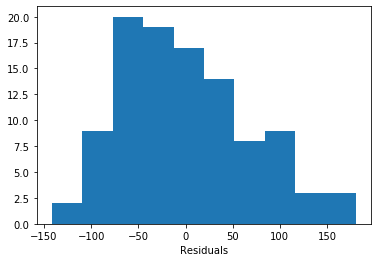

In [131]:
#remove!
ax = plt.hist(h_NOxmax_roads_mod_fit.resid)
plt.xlabel('Residuals')

You should see from your histogram that the distribution is not very normal, and actually looks more like a log-normal distribution. From last `jointplot` for the Hackney data, it looks like _NOxmax_ is the problem (in the sense that this variable is farther from a normal distribution than _RoadsArea_), so let's try a regression model with a log transform of this variable.  

#### Task 6.3 
Fit a regression model for `logNOxmax ~ RoadsArea` for the Hackney data and print the summary to allow interpretation 

In [133]:
#remove!
h_logNOxmax_roads_mod = sm.OLS.from_formula("logNOxmax ~ RoadsArea", data = Hackney) 
h_logNOxmax_roads_mod_fit = h_logNOxmax_roads_mod.fit()
h_logNOxmax_roads_mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logNOxmax   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     61.58
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           4.36e-12
Time:                        17:36:46   Log-Likelihood:                -47.967
No. Observations:                 104   AIC:                             99.93
Df Residuals:                     102   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7701      0.067     71.131      0.000       4.637       4.903
RoadsArea   4.915e-06   6.26e-07      7.848      0.000    3.67e-06    6.16e-06
==============================================================================
Omnibus:                        3.411   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                2.558
Skew:                          -0.237   Prob(JB):                        0.278
Kurtosis:                       2.395   Cond. No.                     1.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Task 6.4 
Plot a histogram to check the distribution of the residuals you have just fit: 

Text(0.5, 0, 'Residuals')

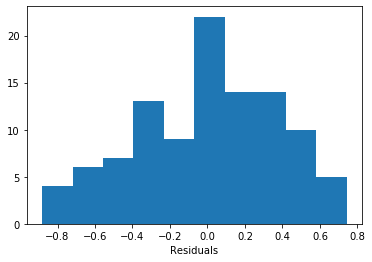

In [134]:
#remove!
ax = plt.hist(h_logNOxmax_roads_mod_fit.resid)
plt.xlabel('Residuals')

From your histogram you should be able to see that the residuals for this model are much more normal, and we can probably be happy with this (given we still have ~100 data points). But note that in other cases we might use the log transform for _both_ variables (i.e. both _RoadsArea_ and _NOxmax_).

Sticking with this model, we now need to check the standardised residuals.

#### Task 6.5 
Calculate standardised residuals for your latest model and plot them against the predicted values

Text(0,0.5,'Standardized Residuals')

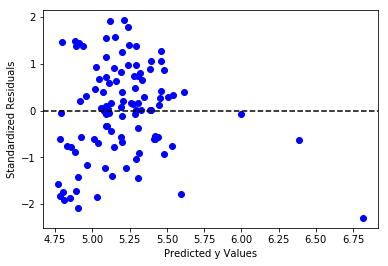

In [51]:
#remove!

#calculate standardized residuals ourselves
h_logNOxmax_roads_mod_sr = (h_logNOxmax_roads_mod_fit.resid / np.std(h_logNOxmax_roads_mod_fit.resid)) 

#standardized residuals vs fitted values
ax = plt.plot(h_logNOxmax_roads_mod_fit.fittedvalues, h_logNOxmax_roads_mod_sr, 'bo')
plt.axhline(linestyle = 'dashed', c = 'black')
plt.xlabel('Predicted y Values')
plt.ylabel('Standardized Residuals')                

The variance of the standardised residuals looks pretty good so let's go back and interpret the summary of the model

#### Task 6.6 

Interpret the results of your regression by answering the following questions:
- What is the r-squared value?
- What is p-value for the `RoadsArea` variable?
- What is the effect size of the `RoadsArea` variable?  (remember one of the variables is a log transform! So see Table 2 of Lin et al. in lecture slides) 
- What is the confidence interval?

> Your answers here.

> Answers:
> 
> r2: 0.376  (better!)
> 
> p-value: <0.001 (still good) 
> 
> effect size: the coefficient is <0.1 so we can interpret this as for a 1% increase in RoadsArea we would expect an increase of 0.00005% in NOx (which is a tiny effect!)
>
> confidence interval: and at 95% confidence we think the effect is between 0.00004% and 0.00006%
> 
> So, this model explains more variation in the data we have examined (for Hackney) but the effect size is much smaller than for the whole of London. We can say with confidence that there _is_ a relationship between _RoadsArea_ and _NOxmax_, but the effect is tiny.   

### Looping through boroughs

Now we have seen how we can investigate correlations and relationships for a single borough, let's think about how we could automate this for all boroughs using grouping and a loop:

In [136]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

boroughs = hrds.groupby('LAD11NM')
bnames   = grouped.groups.keys()

r  = []
sp = []
n  = []

for name in bnames:

    borough = boroughs.get_group(name)
    
    y = np.log(borough['NOxmax'])
    X = np.log(borough['RoadsArea'])
    
    pr  = pearsonr(X,y)
    spn = spearmanr(X,y)
    
    r.append(pr[0])
    sp.append(spn[0])
    n.append(len(y))

    
rSummary  = pd.Series(r, index=bnames)
spSummary = pd.Series(sp, index=bnames)
nSummary  = pd.Series(n, index=bnames)
    
mySummary = pd.concat([rSummary, spSummary, nSummary], axis=1)
mySummary = mySummary.rename(columns={0: "Pearson r", 1: 'Spearman rho', 2: 'n'})

mySummary

,Pearson r,Spearman rho,n
Barking and Dagenham,0.543089,0.595495,103
Barnet,0.379807,0.372189,183
Bexley,0.412889,0.495411,118
Brent,0.422665,0.336975,151
Bromley,0.516009,0.502575,160
Camden,0.332449,0.405144,106
City of London,0.548622,0.542857,6
Croydon,0.340002,0.261124,147
Ealing,0.331427,0.404127,128
Enfield,0.464516,0.407034,149


#### Task 7.1 

Check you understand the code above by adding comments to it to explain its function, and by answering the following questions:
- What package do the `pearsonr` and `spearmanr` functions come from?
- Why do we need to use `pr[0]` and not just `pr` to access the Pearson correlation coefficient?
- Why do we need `axis = ` for the pandas `append` method?

> Your answers here.

> Answers:
> 
> 1. These are both from `scipy.stats` which contains [a lot of utility methods](https://docs.scipy.org/doc/scipy/reference/stats.html) for statistical analysis.
>
> 2. Because these functions return multiple diagnostic measures of which the actual coefficient is only one.
>
> 3. Because we are appending _down_, not _across_.

#### Task 7.2 

It might even be worth seeing if there are any boroughs for which $r$ and $\rho$ are wildly different as this might suggest something worth investigating further.

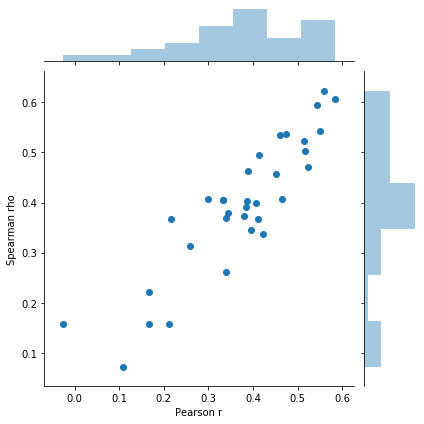

In [137]:
sns.jointplot(x=mySummary['Pearson r'], y=mySummary['Spearman rho'])

## Mapping Borough-level Relationships

Given that we have now calculated borough-level correlations for _all_ boroughs, maybe it would be nice to visualise this using a map. Let's see how we can combine the results from this week so far with code for mapping from previous weeks (look back to the previous notebook if you need a reminder). 

Now, we have spatial information in `boros` and we have the results from all the regressions for each borough in our `mySummary` DataFrame (but without spatial information). So to plot the regression results spatially, we need to `merge` the two DataFrames together into a single DataFrame. 

But what is there a common column we can use?

In [144]:
print(mySummary.columns)

Index(['Pearson r', 'Spearman rho', 'n'], dtype='object')


In [169]:
boros = gpd.read_file('https://github.com/kingsgeocomp/geocomputation/raw/master/data/src/Boroughs.gpkg', driver='GPKG')
print(boros.columns)

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'geometry'], dtype='object')


Doesn't look like there's a common column... So what are we going to do?

The solution here, lies in the fact that the `mySummary` has an `index` (see documentation [here](http://pandas.pydata.org/pandas-docs/stable/indexing.html), and discussion [here](https://stackoverflow.com/questions/27238066/what-is-the-point-of-indexing-in-pandas) ) that matches one of the columns in `df`:

In [57]:
print(mySummary.index)

Index(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype='object')


Where did this come from? 

Well, you may have noticed above that when we made the `mySummary` DataFrame in the loop above, we set the `index` for each `Series` as the value of `bnames`. In turn, `bnames` came from the `keys` of the `GroupBy` object, which in turn was set using the _LAD11NM1_ columns of `df`. That's the long explanation of saying that the `index` of `mySummary` uses the same values as _LAD11NM_.

So now in our [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html), we can use the `right_index` argument, rather than specfying a column:

In [170]:
cordf = pd.merge(boros, mySummary, left_on='NAME', right_index=True, how='inner')
print(cordf.head())
print(cordf.columns)

                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F   
1               Croydon  E09000008   8649.441       0.000         F   
2               Bromley  E09000006  15013.487       0.000         F   
3              Hounslow  E09000018   5658.541      60.755         F   
4                Ealing  E09000009   5554.428       0.000         F   

                                            geometry  Pearson r  Spearman rho  \
0  (POLYGON ((516401.6 160201.8, 516407.3 160210....   0.338344      0.369986   
1  (POLYGON ((535009.2 159504.7, 535005.5 159502,...   0.340002      0.261124   
2  (POLYGON ((540373.6 157530.4, 540361.2 157551....   0.516009      0.502575   
3  (POLYGON ((521975.8 178100, 521967.7 178096.8,...   0.396071      0.344555   
4  (POLYGON ((510253.5 182881.6, 510249.9 182886,...   0.331427      0.404127   

     n  
0   81  
1  147  
2  160  
3  129  
4  128  
Index(['NAME', 'GSS_CODE', 'HECT

Your `cordf` DataFrame should have 61 columns - check you can see the columns of `mySummary` on the far right of the `cordf` DataFrame. 

Also check you understand why the first five rows of the `r`, `sp` and `n` columns all have the same value...

Right, so now we should be able to plot the correlations (the `r` column) as a map... but first we need to convert our `cordf` Pandas DataFrame to a GeoPandas DataFrame, setting the geometry appropriately (look back to Week 8 if you need a reminder of what's going on here): 

In [171]:
gcordf = gpd.GeoDataFrame(cordf)
gcordf = gcordf.set_geometry('geometry')

_Now_ our plotting of the map should work...

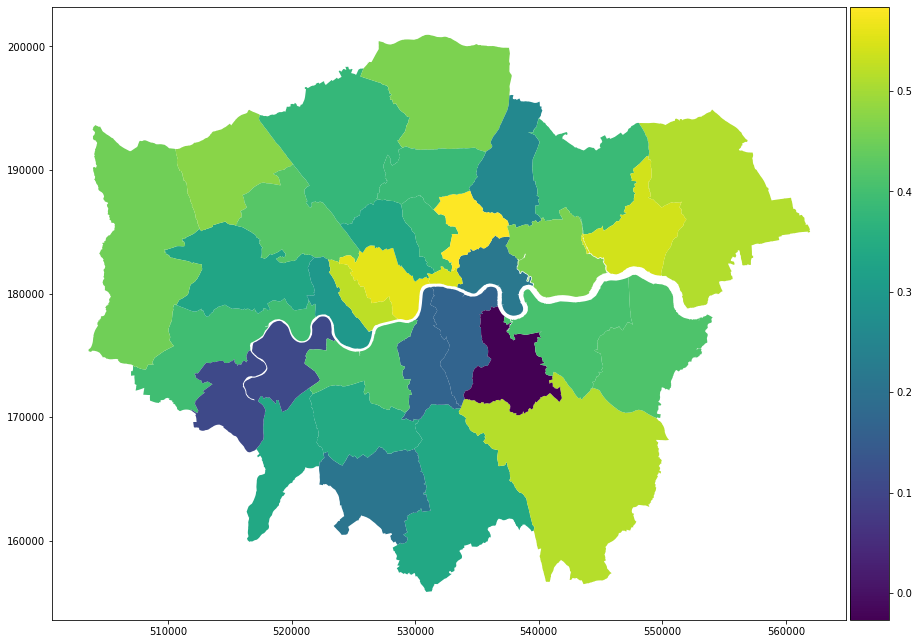

In [174]:
fig, ax = plt.subplots(1,1,figsize=(15,12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
gcordf.plot(column='Pearson r', legend=True, ax=ax, cax=cax)  #include ax argument!

If you've finally managed to get it to all come together, your map should look something like this:

![PySAL Logo](https://kingsgeocomputation.files.wordpress.com/2017/11/cordf_r_map.png)

Well done! 

Have a look at your map and think about what it shows (you may want to add a legend to understand what values the colours refer to). Which borough has the strongest correlation between `NOxmax` and `RoadsArea`? Which has the weakest? Is this the same for the Spearman correlations? etc... 

### Summary

In this practical we have looked at several different ways to calculate (correlation matrix) and visualise (heatplot, pairplot) the correlations between many variables in a dataset. We then saw how we could fit regressions in python (using `statsmodels` functions) for particular pairs of variables; this included thinking about the assumptions of regression and whether transforms of the data were needed to meet those assumptions. Then towards the end we looked at how we could combine grouping of the data to calculate and map borough-level correlations. 

Hopefully you will find many of these techniques useful for analysing the data for your final report. For example, here we focused on on particular pair of variables and one particular borough, but you could look at others for your report.   

### Exercises

Finally, here are some exercises to help you to reinforce, and extent upon, what you have learned above and throughout the module. 

**Exercise 1**

Build on the (looping) code for loopingcalculating correlations for all boroughs to do similar, but instead of calculating correlations, fit regressions (for specified variables in a DF) for ALL boroughs, summarising the results in a table. You may find this [SO question and answer](https://stackoverflow.com/questions/24088439/how-to-apply-ols-from-statsmodels-to-groupby) useful to guide you. 

In [ ]:
#remove!
#with help from https://stackoverflow.com/questions/24088439/how-to-apply-ols-from-statsmodels-to-groupby

linear_regression_grouped = hrds.groupby('LAD11NM')

r2 = []
m = []
c = []
n = []
mp = []
cp = []
sp = []
r = []

groups = linear_regression_grouped.groups.keys()

for group in groups:
    print(group)
    
    #create data objects
    rdf= linear_regression_grouped.get_group(group)
    y = np.log(rdf['NOxmax'])
    X = np.log(rdf['RoadsArea'])
        
    #plot file
    #fig = plt.figure(group)                         #create a plot object
    #fig = sb.regplot(x=np.log(rdf.RoadsArea), y=np.log(rdf.NOxmax))            #add the seaborn pairplot for our dataset
    #plt.savefig('{0}_Regplot.png'.format(group), bbox_inches='tight')     #save the plot with the given filename
    #plt.close()     
    
    from scipy.stats import pearsonr
    pr = pearsonr(X,y)
    
    from scipy.stats import spearmanr
    spn = spearmanr(X,y)
    
    #fit model using OLS
    X= sm.add_constant(X)
    model = sm.OLS(y,X)
    results = model.fit()
    
    
    #get summary of results  (or do this as a dict??)
    r2.append(results.rsquared)
    r.append(pr[0])
    sp.append(spn[0])
    m.append(results.params[1])
    c.append(results.params[0])
    n.append(results.nobs)
    mp.append(results.pvalues[1])
    cp.append(results.pvalues[0])
        

r2Summary = pd.Series(r2, index=groups)
rSummary = pd.Series(r, index=groups)
spSummary = pd.Series(sp, index=groups)
mSummary = pd.Series(m, index=groups)
cSummary = pd.Series(c, index=groups)
nSummary = pd.Series(n, index=groups)
mpSummary = pd.Series(mp, index=groups)
cpSummary = pd.Series(cp, index=groups)

mySummary = pd.concat([rSummary, spSummary, r2Summary, mSummary, mpSummary, cSummary, cpSummary, nSummary], axis=1)
mySummary = mySummary.rename(columns={0: 'r', 1: 'sp', 2: 'r2', 3: 'm', 4: 'm_p', 5: 'c', 6: 'c_p', 7: 'n'})

print(mySummary)

**Excercise 2**

You may have noticed above that we repeated quite a lot of code, but with slight variations in object names, when fitting and analysing the regression models. In circumstances like that (when you are repeating code), it can he useful to write yourself a 'helper function' to speed up your analysis. 

For this exercise, write a helper function to: 
- read a statsmodels.api OLS model and the data it uses
- output (to a .png file) a histogram of the residuals and a plot of standardised residuals against fitted values

You should be able to use much of the code from above, but may also need to use some string formatting functions.  

In [ ]:
#remove!

#define function to help interpret OLS regression output
def mod_diagnostics(model, data):
    
    """
    Output to file model diagnostics for an OLS model
    
    Input:
        model - statsmodels.regression.linear_model.OLS object
        data  - pandas.DataFrame containing data for model
        
    Output:
        XX-XX-OLS_SampleXX_Summary.txt contains the model summary output
        XX-XX-OLS_SampleXX_ResidHist.png is histogram of the residuals
        XX-XX-OLS_SampleXX_StdResid.png is a plot of standardised residuals against fitted values
        
        if model is univariate: XX-XX_OLS_SampleXX_Regression.png is a scatter plot with regression line
        
    Requires:
        statsmodels.api
        pandas
        numpy
        matplotlib.pyplot
    """
    
    fitted = model.fit()
    dep = model.endog_names
    indep_names = ""
    
    #create a string containing list of indep names for output files
    for name in model.exog_names[1:]:            #we don't want 0 element as that is the intercept
        indep_names += "{0}_".format(name)


    #Want to include name of DataFrame in the output filename but currently DataFrame does not have a name attribute
    #So for now use nobs from fitted  (Dan potential solution: pass data in a dictionary and access the label)
    samplesize = str(int(fitted.nobs))
    
    f1 = open("{0}-{1}OLS_Sample{2}_Summary.txt".format(dep, indep_names, samplesize), "w")
    f1.write(fitted.summary().as_text())
    f1.close()

    #calculate standardized residuals ourselves
    fitted_sr = (fitted.resid / np.std(fitted.resid)) 

    #Histogram of residuals
    ax = plt.hist(fitted.resid)
    plt.xlabel('Residuals')
    plt.savefig('{0}-{1}OLS-Sample{2}_ResidHist.png'.format(dep, indep_names, samplesize), bbox_inches='tight')
    plt.close()

    #standardized residuals vs fitted values
    ax = plt.plot(fitted.fittedvalues, fitted_sr, 'bo')
    plt.axhline(linestyle = 'dashed', c = 'black')
    plt.xlabel('Predicted y Values')
    plt.ylabel('Standardized Residuals')                
    plt.savefig('{0}-{1}OLS-Sample{2}_StdResid.png'.format(dep, indep_names, samplesize), bbox_inches='tight')
    plt.close()
  
    
    if(len(model.exog_names) == 2):  #univariate model (with intercept)
            
        indep = model.exog_names[1]
        
        #scatter plot with regression line 
        ax = plt.plot(data[indep], data[dep], 'bo')
        x = np.arange(data[indep].min(), data[indep].max(), 0.1)    #list of values to plot the regression line using
        plt.plot(x, fitted.params[1]*x + fitted.params[0], '-', c = 'black')  #plot a line using the standard equation with parms from the model
        
        plt.xlabel(indep)
        plt.ylabel(dep)                
        plt.savefig('{0}-{1}OLS_Sample{2}_Regression.png'.format(dep, indep, samplesize), bbox_inches='tight')
        plt.close()



### Credits!

#### Contributors:
The following individuals have contributed to these teaching materials: James Millington (james.millington@kcl.ac.uk), Jon Reades (jonathan.reades@kcl.ac.uk)

#### License
These teaching materials are licensed under a mix of the MIT and CC-BY licenses...

#### Acknowledgements:
Supported by the [Royal Geographical Society](https://www.rgs.org/HomePage.htm) (with the Institute of British Geographers) with a Ray Y Gildea Jr Award.